Lab2 Group 3 Members: (Rupak Seal, RS7502), (Aadi Joshi ,aj1566), (Jose Velazquez,jav4534)

1) Please read about the following Python libraries.
* Matplotlib: https://realpython.com/python-matplotlib-guide/
* Math: https://docs.python.org/3/library/math.html
* Time: https://docs.python.org/3/library/time.html
* Socket: https://docs.python.org/3/library/socket.html
* Threading: https://docs.python.org/3/library/threading.html

a) Download the product sales data from the below link:

https://drive.google.com/file/d/19Xu297MPLVFTR2VuvDLUPRi3o36ijqW6/view?usp=sharing

Using Matplotlib library, plot the sales of each product for whole year (Y axis- Sales and X axis- Month). 
Use Dashed line for plot and different colors for each product.

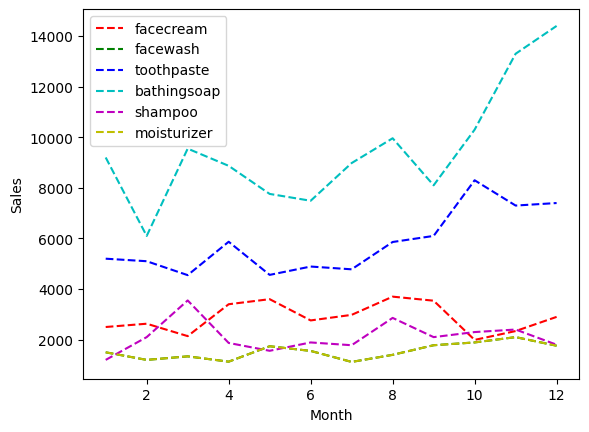

In [71]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt

#Converted from .numbers to .csv using Google Sheets
data = pd.read_csv('product_sales_Data.csv')
months = data['month_number']
facecream_sales = data['facecream']
facewash_sales = data['facewash']
toothpaste_sales = data['toothpaste']
bathingsoap_sales = data['bathingsoap']
shampoo_sales = data['shampoo']
moisturizer_sales = data['moisturizer']
plt.plot(months, facecream_sales, 'r--', label='facecream')
plt.plot(months, facewash_sales, 'g--', label='facewash')
plt.plot(months, toothpaste_sales, 'b--', label='toothpaste')
plt.plot(months, bathingsoap_sales, 'c--', label='bathingsoap')
plt.plot(months, shampoo_sales, 'm--', label='shampoo')
plt.plot(months, moisturizer_sales, 'y--', label='moisturizer')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

b) Using Math library calculate the following:
* Ceiling of 435/6.
* Floor of 2667/8.
* Factorial of 25.
* Sum of the elements of array: [0.2, 0.33, 0.12, 0.57, 341.1, 23.77, 11.919, 9.1, 10.4, 4.4]

We note that each bullet point here ends with a "." while previously they did not. This may be indicating that the numbers are floating point and not integers. For the first two the answer does not change, while for the factorial the return value will be either an integer or float depending on what is chosen. As usually a number would follow the decimal point to explicitly show that it is a float (e.g. 6.0 instead of just 6.) we choose to treat the number as an integer.

In [3]:
import math

## Ceiling of 435/6
ceiling = math.ceil(435/6)
print("Ceiling of 435/6:", ceiling)
## Floor of 2667/8
floor = math.floor(2667/8)
print("Floor of 2667/8:", floor)
## Factorial of 25
factorial = math.factorial(25)
print("Factorial of 25:", factorial)

## Sum of the elements of array: [0.2, 0.33, 0.12, 0.57, 341.1, 23.77, 11.919, 9.1, 10.4, 4.4]
array = [0.2, 0.33, 0.12, 0.57, 341.1, 23.77, 11.919, 9.1, 10.4, 4.4]
array_sum = sum(array)
print("Sum of array elements:", array_sum)

Ceiling of 435/6: 73
Floor of 2667/8: 333
Factorial of 25: 15511210043330985984000000
Sum of array elements: 401.909


c) Use time library to find what time following tuple represents: t = (2007, 8, 10, 14, 20, 6, 7, 258, 0)

We note that the values given in this time tuple are not consistent. The day according to the first three values of the tuple is 2007-08-10, but the y_day is 258, indicating that it should be the 258th day of the year 2007 (which is 2007-09-15). As the problem requires that the time library be used, we can find that the cpython time_mktime() function calls the c mktime() function (see [here](https://github.com/python/cpython/blob/main/Modules/timemodule.c#LL1091C22-L1091C22)), which in turn calculates the day of the year from the year, month, and month day (see [here](https://codebrowser.dev/glibc/glibc/time/mktime.c.html#358)). Thus, the given y_day will be ignored and 2007-08-10 will be used.

The day of the week that is given is 7, which is also out of the accepted range (0, 6). In this case it appears that the original value for w_day is overwritten with -1 before being sent to the c mktime function, meaning that the original value is ignored (see [here](https://github.com/python/cpython/blob/main/Modules/timemodule.c#LL1091C22-L1091C22)).

While the time library handles these cases by default, we would still raise these issues with the relevant stakeholders as they may indicate bigger problems with how these time tuples are being constructed. In particular, functions that use the y_day or w_day (e.g. time.asctime()) could be affected by these issues.

In [33]:
import time

t = (2007, 8, 10, 14, 20, 6, 8, 258, 0)
tuple_timestamp = time.mktime(t)
tuple_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(tuple_timestamp))

print("Time represented by the tuple:", tuple_time)

Time represented by the tuple: 2007-08-10 14:20:06


d) What is socket library in Python? Why is it used? Give one brief example.

Sockets are an abstraction used in UNIX systems to represent an end-point in two-way communications. The socket library in Python provides a low-level networking interface that is a transliteration of the UNIX system calls for sockets [1]. The socket library makes it easier for programmers to establish network connections, send and receive data, and handle network-related tasks.


[1] https://docs.python.org/3/library/socket.html

In [75]:
#An example script to connect to Yahoo using socket
#Client Side socket connection

import socket 
import sys
 
try:
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM) #AF_INET represents IPv4, Sock_Stream represents TCP
    print ("Socket successfully created")
except socket.error as err:
    print ("socket creation failed with error %s" %(err))
 
port = 80# default port for socket
 
try:
    host_ip = socket.gethostbyname('www.yahoo.com')
except socket.gaierror:

    print ("there was an error resolving the host")
    sys.exit()
 
# connecting to the server
s.connect((host_ip, port))
 
print ("the socket has successfully connected to yahoo .... by Lab2 Group 3 Members")

Socket successfully created
the socket has successfully connected to yahoo .... by Lab2 Group 3 Members


e) What is multithreading?
Using Threading library, write a Python program to calculate the factorial of number 21 and square root of number 91

In [77]:
##Multithreading is a concept in parallel computing where multiple threads are created within a process. These threads can execute 
#independently and concurrently, sharing the same process resources such as memory. Multithreading allows for more efficient utilization of CPU resources 
#and can improve the performance of certain tasks that can be executed concurrently.

In [78]:
import threading
import math
g=21
s=91
def factorial(x):
    fact=math.factorial(x)
    print("factorial is:",fact)
def sqrt(x):
    sqr=math.sqrt(x)
    print("Square root is:",sqr)
t1 = threading.Thread(target=factorial, args=(g,))
t2 = threading.Thread(target=sqrt, args=(s,))
t1.start()
t2.start()
t1.join()
t2.join()
print("Calculated using multithreading")

factorial is: 51090942171709440000
Square root is: 9.539392014169456
Calculated using multithreading


# 2) Please answer the following:
## a) Come up with three differences between symmetric and asymmetric encryption. 
Asymmetric

1. Asymmetric uses a public and a private key to encrypt and decrypt
2. Usage: Confidentiality, Digital Signatures
3. One of the keys is known for to two or more parties, Public Key, the private should only be known to one party


Symmetric

1. Symmetric encryption uses a single shared key known to two or more parties to encrypt and decrypt
2. Usage: Confidentiality
3. Not that safe as the security depends upon the secrecy of the shared key. If the key is compromised then anyone can decrypt data.
####  Which one do you think is better? 
According to me asymmetric encryption is better as it is more secure than symmetric encryption. Symmetric encryption depends on the confidentiality of the shared key. Asymmetric encryption uses public key to encrypt and private to decrypt. This private key is not shared and is secret. Asymmetric sacrifices security for speed and security is more important. An ideal solution would be to use a combination of both. 
TLS uses both to encrypt/decrypt data and therefor has the ability to implement Perfect Forward Secrecy depending on the ciphersuites used.

#### Explain why you think one is better than the other in a few sentences.
## b) Is AES 256 symmetric or asymmetric?
AES-256 is symmetric encryption.

In [79]:
# 3) Pydantic is a helpful library for data parsing and validation. 
# It coerces input types to the declared type (using type hints),
# accumulates all the errors using ValidationError & it’s also well documented, making it easily discoverable.
## a) Go over the documentation and try understanding how to use this library's methods.
#### Link 1
#### Link 2
## c) Go over pydantic.py, which has classes written in pydantic, and a write up of what each class does and how pydantic is used.
#### Pydantic.py


On a high level, the given python program loads, reads, parses and validates the data stored in the data.json file. Based on the given structure in the comment and the pydantic models created, data.json contains data regarding a set of books, each containing attributes like title, subtitle, author,  publisher, isbn_10, isbn_13 etc.  

The first step in using pydantic to parse and validate a dataset is to define the models for objects. Models in pydantic are simply classes that inherit from pydantic.BaseModel. In our program we have two model classes, respectively Book and Author.

Book is a model with eight fields where the first four are required, while the last four are not:
title, author and publisher are strings and are required, price is a floating-point number and is required, isbn_10, isbn_13 and subtitle are string and are non-required and author2 holds an instance of the class Author and is optional. 
Author is a model with only two fields, both required, respectively name which is a string and verified which is a Boolean. 

Book is our main model which in addition to type annotations contains two custom validation methods also known as validators in pydantic: check_isbn_10_or_13 and isbn_10_valid.

check_isbn_10_or_13 is a root validator, which means that it can perform validations on our entire Book model and not just on specific fields of the model. It also has pre=True which means that it will be called before any other field validator we might have defined for the model. What it does is that is checks if either isbn_10 or isbn_13 has a value. If not, it raises a custom error ISBNMissingError with arguments the book title and error message. ISBNMissingError and ISBN10FormatError are Exception subclasses, they serve as a mean to create custom exceptions in python and are not directly related to pydantic.

isbn_10_valid is a field validator. It parses isbn_10, and check if the length is not 10 or the weighted sum of the isbn digits is a not multiple of 11. If so, it raises a custom error ISBN10FormatError with arguments the book ISBN_10 and error message.

At the end of the Book model, we see a Config class. The Config class enables us to control the behavior of a base model. In our concrete Config class, there are two options which have been set. First allow_mutation is set to False, meaning the model instances are immutable (changing the values of instance attributes will result in errors). The second option anystr_lower is set to True, which will basically convert all the string values in our model to lowercase.

The last thing that catches our eye is the line books[0].dict(exclude={"price"}) in the main method. As mentioned in the pydantic documentation, models can be converted and exported in a number of ways including dictionaries. The given line produces as output a dictionary with key-value pairs of the attributes of the first book excluding the price.

In [80]:
# 4) Cerberus provides powerful yet simple and lightweight data validation functionality 
# out of the box and is designed to be easily extensible, allowing for custom validation. 
# It’s very similar to Pydantic and you go over the documentations here. It’s like Pydantic with slight variations.
## a) Go over this article and modify the code in the given article to add extra validations to the given schema. 
#### Mind you that you can add extra key value pairs to the dictionary itself and then add validations for those.
## b) Write your modifications.

### Modifications made:

1. Added "forbidden": ["N/A"] validation for the <u>name</u> attribute because we want to exclude the value N/A. The name should be a valid name and not be marked as not applicable


2. Added a new mandatory attribute to reflect the <u>gender</u> of the customer. It's allowed values are M(for male), F(for female), T (transgender), NB (non-binary), NP(prefer not to respond)


3. Added a mandatory attribute <u>ssn</u>for the customer's ocial security number (SSN) and used a regex expression and length validation for the format: the SSN is a string of 11 character: 9 digits divided into 3 parts by - (hyphen). The first part has 3 digits that are not 000, 666, or between 900 and 999 (regex -> <b>(?!666|000|9\\d{2})\\d{3}</b>). The second part has 2 digits and it should be from 01 to 99 (regex -> <b>(?!00)\\d{2}</b>). The third part is a 4 digitnumber between 0001 - 9999(regex -> <b>(?!0{4})\\d{4}</b>).<br>


4. Added a mandatory attribute <u>customer_type</u> string to indetify the customer's type. It's allowed values are IND(individual), BUS(for-profit business), NPO (non-profit organisation)


5. Added two attribute <u>has_guardian</u> and <u>guardian_name</u> to account for situations in which the customer is a minor. The attribute is required an can be either True or False (boolean), while guardian_name is a string attribute from 2-255 characters long that is not mandatory. <br><br>If the customer has a guardian we expect the value of has_guardian to be True and the guardian's name to be provided under  guardian_name. Alternatively the field guardian_name shouldn't be present and has_guardian should be False. To validate this requirement we have added the following validation rule: <b>"oneof": [{"excludes": "guardian_name", "allowed": [False]}, {"allowed": [True]}]</b>. 


6. Added a optional attribute <u>risk_indicator</u> to reflect the customer's risk level. We are using a qualitative risk classification method so the allowed values are High, Medium or Low


7. Added a optional attribute <u>aml_classification</u> to account for situations in which our customer falls into one of the risky categories under anti-money-laundering. We have added an "allowed" validation rule where we specify the possible categories.<br><br> In addition, customers that are associated with one of these categories have a high risk, hence if a customer has a value for aml_classification then it should have a High value for risk_indicator. To verify this, we use the following validation rule: <b>"dependencies": {"risk_indicator": ["High"]}</b>, meaning aml_classification is depended on risk_indicator and the later is allowed only a value of High if aml_classification is  specified.


8. Added two optional attributes <u>address_line_1</u> and <u>address_line_2</u> under contact_details, both string of maximum length of 255 characters. Both are optional, but address line 2 is dependend on address line 1 (validation rule-> <b>"dependencies": ["address_line_1"]</b>), hence if the address line 2 is specified the address line 1 should be specified as well. Alternatively we can have none specified, or just address line 1.

In [81]:
!pip install cerberus

3460.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [82]:
from dataclasses import dataclass

@dataclass
class Customer:
    id: int
    name: str
    gender: str
    ssn: str
    customer_type: str
    has_guardian: bool
    guardian_name: str
    risk_indicator: str
    aml_classification: bool
    accounts: list
    contact_details: dict
schema = {
    "id": {
        "type": "integer",
        "min": 0,
        "max": 100,
        "required": True
  },
    "name": {
        "type": "string",
        "minlength": 2,
        "maxlength": 255,
        "forbidden": ["N/A"],
        "required": True
  },
    "gender":{
        "type": "string",
        "allowed":["M", "F", "T", "NB", "NS"],
        "required": True
    },
    "ssn": {
        "type": "string",
        "minlength": 11,
        "maxlength": 11,
        "required": True,
        "regex" : "^(?!666|000|9\\d{2})\\d{3}-(?!00)\\d{2}-(?!0{4})\\d{4}$" 
    },
    "customer_type": {
        "type": "string",
        "allowed": ["IND", "BUS", "NPO"],
        "required": True
    },
    "has_guardian": {
       "required": True,
        "type": "boolean",
        "oneof": [{"excludes": "guardian_name", "allowed": [False]}, {"allowed": [True]}]
    },
    "guardian_name": {
        "type": "string",
        "minlength": 2,
        "maxlength": 255,
        "required": False
  },
    "risk_indicator": {
        "type": "string",
        "allowed": ["High", "Medium", "Low"],
        "required": False
    },
    "aml_classification":{
        "type": "string",
        "allowed": ["Politically Exposed Persons", "Embassy, Foreign Consulate", "Foreign Mission Accounts", "Non-Bank Financial Institutions",
"Nonprofit Organizations", "Cash-Intensive Businesses"],
        "required": False,
        "dependencies": {"risk_indicator": ["High"]}
    },
    "accounts": {
        "type": "list",
        "schema": {
          "type": "integer",
          "min": 0,
          "max": 100
        }
  },
    "contact_details": {
        "type": "dict",
        "schema": {
            "phone": {
                "type": "string",
                "minlength": 11,
                "maxlength": 11,
                "regex": "^0[0-9]{10}$"
          },
            "email": {
                "type": "string",
                "minlength": 2,
                "maxlength": 255,
                "required": True,
                "regex": "^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\\.[a-zA-Z0-9-.]+$"
        },
            "address_line_1": {
                "type": "string",
                "maxlength": 255,
                "required": False
        },
            "address_line_2": {
                "type": "string",
                "maxlength": 255,
                "required": False,
                "dependencies": ["address_line_1"]
        
        }
    }
  }
}

customer_1 = {
    "id": 1,
    "name": "RUPAK  SEAL",
    "gender": "F",
    "ssn": "111-11-1111",
    "customer_type": "IND",
    "has_guardian": False,
    "risk_indicator": "Low",
    "accounts": [1, 2],
    "contact_details": {
        "phone": "09141111111",
        "email": "rs7502@nyu.edu",
        "address_line_1": "138 Ladd Dr"
    }
}

customer_2 = {
    "id": 1,
    "name": "RUPAK  SEAL",
    "gender": "F",
    "ssn": "111-11-1111",
    "customer_type": "IND",
    "has_guardian": False,
    "guardian_name": "Guadian X",
    "risk_indicator": "Low",
    "accounts": [1, 2],
    "contact_details": {
        "phone": "09141111111",
        "email": "rs7502@nyu.edu",
        "address_line_1": "138 Ladd Dr"
    }
}

customer_3 = {
    "id": 1,
    "name": "RUPAK  SEAL",
    "gender": "F",
    "ssn": "000-11-1111",
    "customer_type": "IND",
    "has_guardian": False,
    "risk_indicator": "Low",
    "aml_classification": "Nonprofit Organizations",
    "accounts": [1, 2],
    "contact_details":{
        "phone": "09141111111",
        "email": "rs7502@nyu.edu",
        "address_line_1": "138 Ladd Dr"
    }
}

customer_4 = {
    "id": 1,
    "name": "RUPAK  SEAL",
    "gender": "F",
    "ssn": "111-11-1111",
    "customer_type": "IND",
    "has_guardian": False,
    "risk_indicator": "High",
    "aml_classification": "Nonprofit Organizations",
    "accounts": [1, 2],
    "contact_details": {
        "phone": "09141111111",
        "email": "rs7502@nyu.edu",
        "address_line_1": "138 Ladd Dr"
    }
}

customer_5 = {
    "id": 1,
    "name": "RUPAK  SEAL",
    "gender": "F",
    "ssn": "111-11-1111",
    "customer_type": "IND",
    "has_guardian": False,
    "risk_indicator": "High",
    "aml_classification": "Nonprofit Organizations",
    "accounts": [1, 2],
    "contact_details": {
        "phone": "09141111111",
        "email": "rs7502@nyu.edu",
        "address_line_1": "138 Ladd Dr"
    }
}

import json
import os
import re

from cerberus import Validator

class Api:
    def create_customer(self, payload: dict) -> Customer:
        """
        validates payload and - only if valid - instantiates a Customer
        :param payload: payload containing Customer details
        :return: newly instantiated Customer if payload is valid
        """
        self.validate_payload(payload)

        return Customer(**payload)

    @staticmethod
    def validate_payload(payload: dict):
        """
        validate payload against a Cerberus schema
        :param payload: payload to be validated
        :return: nothing
        """

        validator = Validator()
        validator.validate(payload, schema)

        if validator.errors:
            print("Validation failed:"+ str(validator.errors)+"\n")
            exit(f"Validation failed: {validator.errors}")
        else:
            print("Successful validation!\n")

            print("Customer 1 is a valid customer.")
Api().validate_payload(customer_1)

print("Customer 2 is an invalid customer: has_guardian marked false while providing a guardian's name.")
Api().validate_payload(customer_2)

print("Customer 3 is an invalid customer: Invalid SSN and risk indicator is Low when the client has AML classification.")
Api().validate_payload(customer_3)

print("Customer 4 is an invalid customer: provided address line 2 whithout address line 1.")
Api().validate_payload(customer_2)

print("Customer 5 is a valid customer.")
Api().validate_payload(customer_5)

Successful validation!

Customer 1 is a valid customer.
Customer 2 is an invalid customer: has_guardian marked false while providing a guardian's name.
Validation failed:{'has_guardian': ['none or more than one rule validate', {'oneof definition 0': ["'guardian_name' must not be present with 'has_guardian'"], 'oneof definition 1': ['unallowed value False']}]}

Customer 3 is an invalid customer: Invalid SSN and risk indicator is Low when the client has AML classification.
Validation failed:{'aml_classification': ["depends on these values: {'risk_indicator': ['High']}"], 'ssn': ["value does not match regex '^(?!666|000|9\\d{2})\\d{3}-(?!00)\\d{2}-(?!0{4})\\d{4}$'"]}

Customer 4 is an invalid customer: provided address line 2 whithout address line 1.
Validation failed:{'has_guardian': ['none or more than one rule validate', {'oneof definition 0': ["'guardian_name' must not be present with 'has_guardian'"], 'oneof definition 1': ['unallowed value False']}]}

Customer 5 is a valid customer.